In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load dataset
df = pd.read_csv('Better_Life_Unfiltered.csv')

In [3]:
# Display basic information
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89712 entries, 0 to 89711
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STRUCTURE           89712 non-null  object 
 1   STRUCTURE_ID        89712 non-null  object 
 2   STRUCTURE_NAME      89712 non-null  object 
 3   ACTION              89712 non-null  object 
 4   REF_AREA            89712 non-null  object 
 5   Reference area      89712 non-null  object 
 6   MEASURE             89712 non-null  object 
 7   Measure             89712 non-null  object 
 8   UNIT_MEASURE        89712 non-null  object 
 9   Unit of measure     89712 non-null  object 
 10  AGE                 89712 non-null  object 
 11  Age                 89712 non-null  object 
 12  SEX                 89712 non-null  object 
 13  Sex                 89712 non-null  object 
 14  EDUCATION_LEV       89712 non-null  object 
 15  Education level     89712 non-null 

In [28]:
# Unique measures
def custom_sort_key(val):
    if isinstance(val, str):
        parts = val.split('_')
        parts = [int(part) if part.isdigit() else part for part in parts]
        return ('_', parts) if val.startswith('_') else ('0', parts)
    return ('1', val)

# Apply the custom sorting key
measures = df[['MEASURE', 'Measure']].drop_duplicates()
measures = measures.sort_values(by='MEASURE', key=lambda col: col.map(custom_sort_key))
pd.options.display.max_rows = 100
print(measures)

        MEASURE                                            Measure
931         1_1  Households and NPISHs net adjusted disposable ...
1615        1_2   Top average household disposable income quintile
210         1_3                                  Median net wealth
950     1_3_VER                   Top wealthiest households decile
5979        1_4  Household disposable income below the relative...
2301        1_5                        Difficulty making ends meet
955         1_6  Equivalised liquid financial assets below thre...
213         2_1                                    Employment rate
253         2_2                                    Gender wage gap
272         2_3                        Long-term unemployment rate
318         2_4     Youth not in employment, education or training
338         2_5                           Labour market insecurity
368         2_6                                         Job strain
373         2_7                            Long hours in paid 

In [23]:
# Countries
countries = np.sort(df['Reference area'].unique())
ncountries = df['Reference area'].nunique()
print(countries)
print(ncountries)

['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Colombia' 'Costa Rica'
 'Czechia' 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Korea' 'Latvia'
 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand' 'Norway'
 'Poland' 'Portugal' 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden'
 'Switzerland' 'Türkiye' 'United Kingdom' 'United States']
38


In [52]:
# Time
years = np.sort(df['TIME_PERIOD'].unique())
print(years)

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024]


In [53]:
# Countries with 'Median net wealth' measure
nw_countries = np.sort(df[['Reference area', 'Measure']][df['Measure'] == 'Median net wealth']['Reference area'].unique())
print(nw_countries)

['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Denmark' 'Estonia'
 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Ireland' 'Italy' 'Korea'
 'Latvia' 'Lithuania' 'Luxembourg' 'Netherlands' 'New Zealand' 'Norway'
 'Poland' 'Portugal' 'Slovak Republic' 'Slovenia' 'Spain' 'United Kingdom'
 'United States']


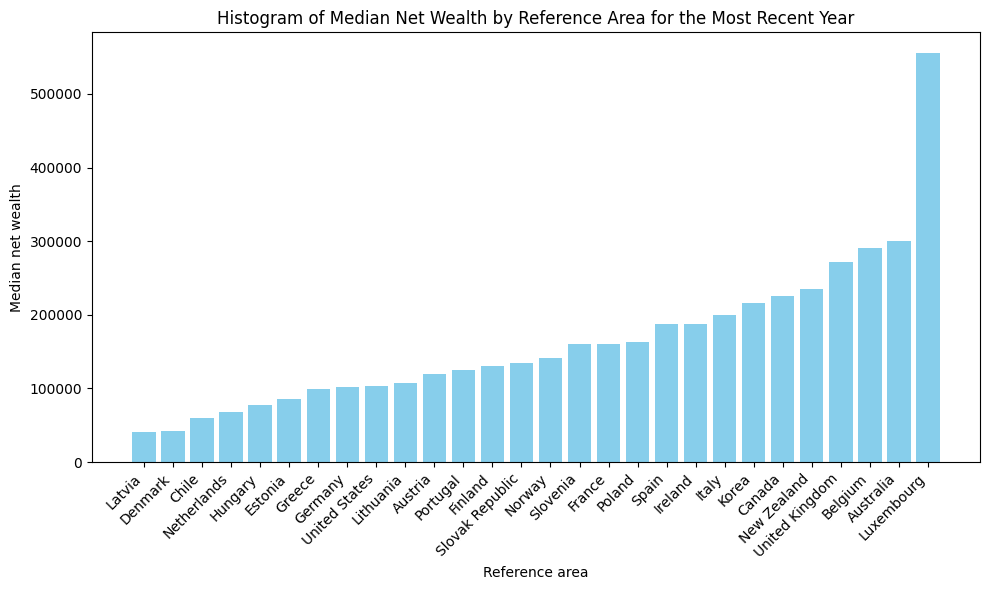

In [41]:
# Histogram of net wealth in 2018 by country
filtered_df = df[df['Measure'] == 'Median net wealth']

# Find the most recent year for each country
most_recent_years = filtered_df.groupby('Reference area')['TIME_PERIOD'].max().reset_index()

# Merge with the original DataFrame to get the rows corresponding to the most recent year for each country
most_recent_df = pd.merge(filtered_df, most_recent_years, on=['Reference area', 'TIME_PERIOD'])

# Sort the DataFrame by 'OBS_VALUE' in ascending order
sorted_df = most_recent_df.sort_values(by='OBS_VALUE')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_df['Reference area'], sorted_df['OBS_VALUE'], color='skyblue')
plt.xlabel('Reference area')
plt.ylabel('Median net wealth')
plt.title('Histogram of Median Net Wealth by Reference Area for the Most Recent Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

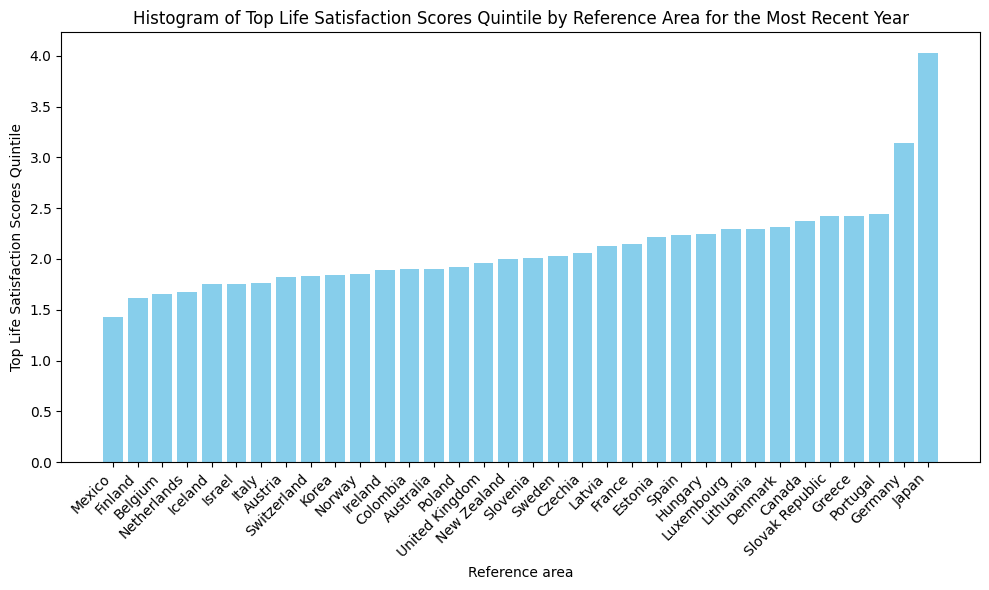

In [54]:
filtered_df = df[df['Measure'] == 'Top life satisfaction scores quintile']

# Find the most recent year for each country
most_recent_years = filtered_df.groupby('Reference area')['TIME_PERIOD'].max().reset_index()

# Merge with the original DataFrame to get the rows corresponding to the most recent year for each country
most_recent_df = pd.merge(filtered_df, most_recent_years, on=['Reference area', 'TIME_PERIOD'])

# Sort the DataFrame by 'OBS_VALUE' in ascending order
sorted_df = most_recent_df.sort_values(by='OBS_VALUE')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_df['Reference area'], sorted_df['OBS_VALUE'], color='skyblue')
plt.xlabel('Reference area')
plt.ylabel('Top Life Satisfaction Scores Quintile')
plt.title('Histogram of Top Life Satisfaction Scores Quintile by Reference Area for the Most Recent Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()